In [386]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [387]:
data=pd.read_csv('oasis_longitudinal.csv')

In [388]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [389]:
data.shape

(373, 15)

In [390]:
data.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [391]:
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [392]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [393]:
df = data.loc[data['Visit']==1]

In [394]:
df = df.reset_index(drop=True)

In [395]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [396]:
from sklearn.preprocessing import LabelEncoder 

In [397]:
lab=LabelEncoder()

In [398]:
df['M/F']=lab.fit_transform(df['M/F'])
df['Group']=lab.fit_transform(df['Group'])
df['Hand']=lab.fit_transform(df['Hand'])

In [399]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,2,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,OAS2_0002_MR1,1,1,0,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,OAS2_0004_MR1,2,1,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,OAS2_0005_MR1,2,1,0,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,OAS2_0007_MR1,1,1,0,1,0,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [400]:
df1=df.drop(df[['Subject ID','MRI ID','Visit']],axis=1)
df1.head()

,Group,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,0,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,2,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,2,0,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,1,0,1,0,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [401]:
df1.isnull().sum()

Group       0
MR Delay    0
M/F         0
Hand        0
Age         0
EDUC        0
SES         8
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

In [402]:
df2=df1.dropna()
df2.isnull().sum()

Group       0
MR Delay    0
M/F         0
Hand        0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

<AxesSubplot:xlabel='Group', ylabel='count'>

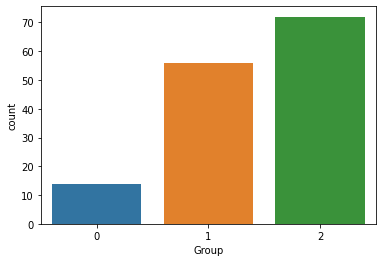

In [403]:
sns.countplot(x='Group',data=df2)

In [404]:
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and Demented rate')

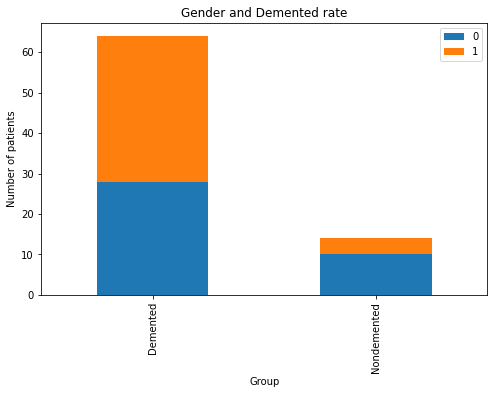

In [405]:
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

(15.3, 30.0)

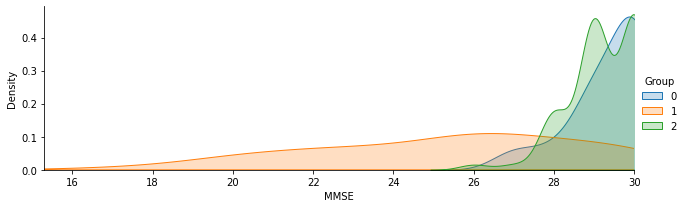

In [406]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

(0.5, 2.0)

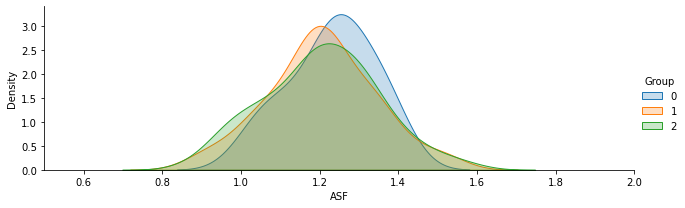

In [407]:
#bar_chart('ASF') = Atlas Scaling Factor
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

(0.6, 0.9)

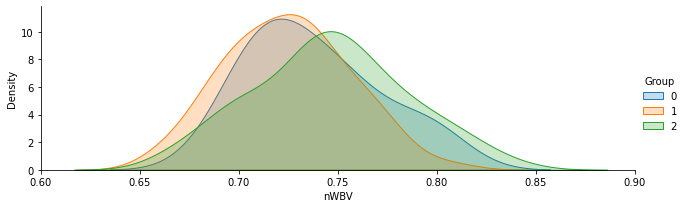

In [408]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

(900.0, 2100.0)

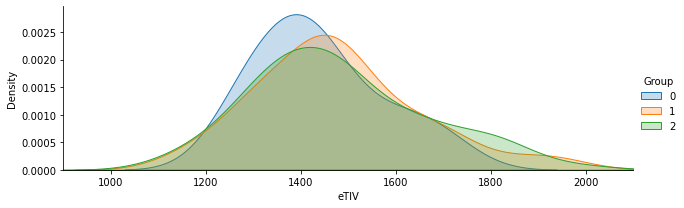

In [409]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

(0.0, 0.16)

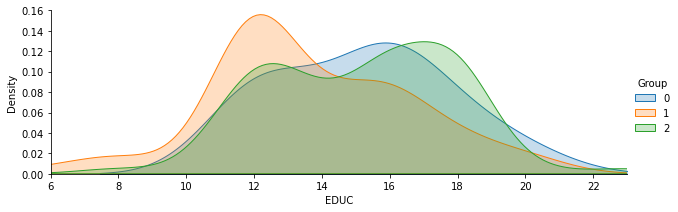

In [410]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

In [411]:
x=df2.iloc[:,df2.columns!='Group']
y=df2.iloc[:,df2.columns=='Group']

In [412]:
x.shape

(142, 11)

In [413]:
x.head()

,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,0,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
5,0,0,0,93,14,2.0,30.0,0.0,1272,0.698,1.380
6,0,1,0,68,12,2.0,27.0,0.5,1457,0.806,1.205


In [414]:
y.head()

,Group
0,2
2,2
3,2
5,2
6,1


In [415]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score, roc_curve, auc

In [416]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [417]:
xtrain.head()

,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
96,0,1,0,73,20,2.0,30.0,0.0,1842,0.758,0.953
87,0,1,0,86,12,4.0,29.0,0.0,1783,0.703,0.984
41,0,0,0,92,23,1.0,29.0,0.0,1454,0.701,1.207
116,0,0,0,69,16,3.0,29.0,0.0,1380,0.819,1.272
23,0,0,0,86,12,3.0,30.0,0.0,1430,0.718,1.227


In [418]:
ytrain.head()

,Group
96,2
87,2
41,2
116,2
23,0


In [419]:
from sklearn.svm import SVC

In [420]:
model1=SVC(random_state=10)

In [421]:
model1.fit(xtrain,ytrain)

SVC(random_state=10)

In [422]:
predic1=model1.predict(xtest)

In [423]:
acc1=accuracy_score(predic1,ytest)
acc1

0.46511627906976744

In [424]:
from sklearn.metrics import classification_report
acc1=accuracy_score(predic1,ytest)
print("Accuracy: ")
print(acc1)
print("\n Classification report of SVM: \n {}".format(classification_report(ytest,predic1)))

Accuracy: 
0.46511627906976744

 Classification report of SVM: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        18
           2       0.47      1.00      0.63        20

    accuracy                           0.47        43
   macro avg       0.16      0.33      0.21        43
weighted avg       0.22      0.47      0.30        43



In [425]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model2=RandomForestClassifier(n_estimators=100,random_state=10)
model2.fit(xtrain,ytrain)

y_pred = model2.predict(xtest) 
y_pred

acc2=metrics.accuracy_score(ytest,y_pred)
print("Accuracy: ")
print(acc2)

print("\n Classification report of Random Forest: \n {}".format(classification_report(ytest,y_pred)))

Accuracy: 
0.8837209302325582

 Classification report of Random Forest: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      1.00      1.00        18
           2       0.80      1.00      0.89        20

    accuracy                           0.88        43
   macro avg       0.60      0.67      0.63        43
weighted avg       0.79      0.88      0.83        43



In [426]:
from sklearn.tree import DecisionTreeClassifier 

model3=DecisionTreeClassifier(random_state=10)


model3.fit(xtrain, ytrain) 

y_pred = model3.predict(xtest) 

acc3=metrics.accuracy_score(ytest,y_pred)
print("Accuracy: ")
print(acc3)

print("\n Classification report of Decision Tree: \n {}".format(classification_report(ytest,y_pred)))

Accuracy: 
0.7674418604651163

 Classification report of Decision Tree: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      1.00      1.00        18
           2       0.75      0.75      0.75        20

    accuracy                           0.77        43
   macro avg       0.58      0.58      0.58        43
weighted avg       0.77      0.77      0.77        43



In [427]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(xtrain, ytrain) 

y_pred = model3.predict(xtest) 

acc4=metrics.accuracy_score(ytest,y_pred)
print("Accuracy: ")
print(acc4)

print("\n Classification report of Naive Bayes: \n {}".format(classification_report(ytest,y_pred)))

Accuracy: 
0.7674418604651163

 Classification report of Naive Bayes: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      1.00      1.00        18
           2       0.75      0.75      0.75        20

    accuracy                           0.77        43
   macro avg       0.58      0.58      0.58        43
weighted avg       0.77      0.77      0.77        43



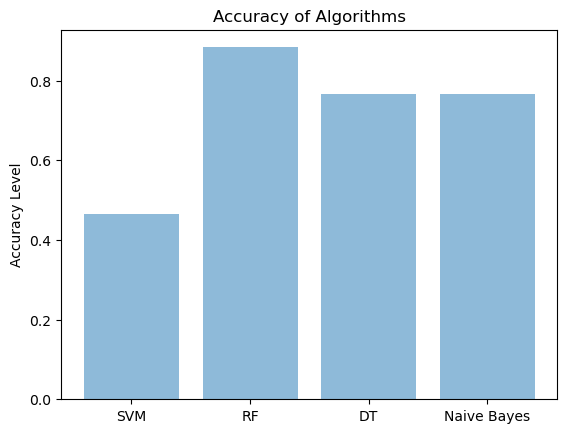

In [428]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('SVM','RF','DT','Naive Bayes')
y_pos = np.arange(len(objects))
performance = [acc1,acc2,acc3,acc4]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Level')
plt.title('Accuracy of Algorithms')
 
plt.show()

In [429]:
import pickle
pickle.dump(model3, open('model.pkl','wb'))